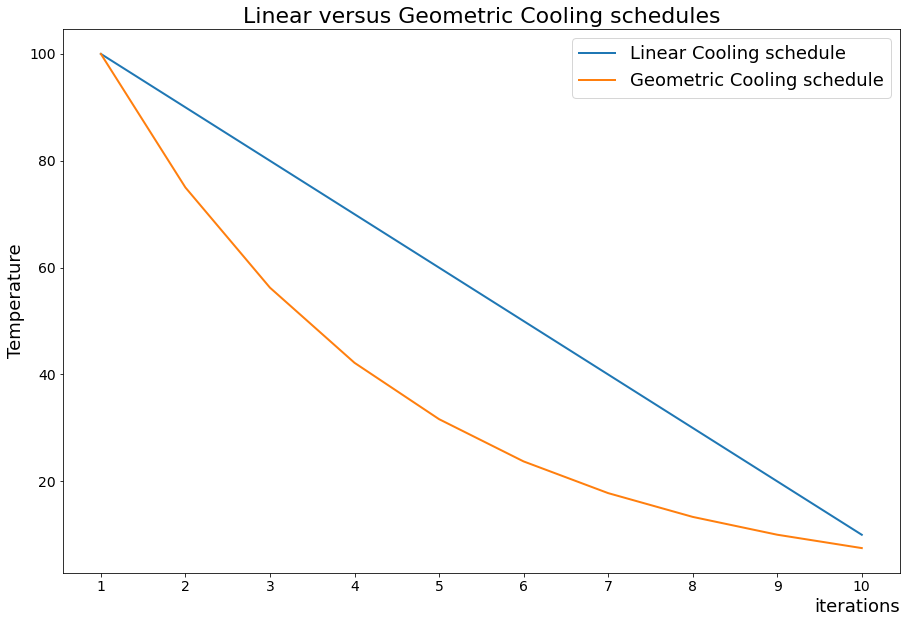

In [1]:
import numpy as np
import matplotlib.pyplot as plt

T_init=100 # initial temperature
T_fin=0.001 # final temperature

# Linear cooling schedule
N=10 # maximum number of iterations
T_lin=[]
beta=(T_init-T_fin)/N

#  Geometric cooling schedule
T_geo=[]
alpha=0.75 # alpha values between 0.7 to 0.95 are commonly used

for i in range(N):
    T_lin.append(T_init-beta*i)
    T_geo.append(T_init*alpha**i)
    
# Plot the annealing schedules
plt.figure(figsize=(15, 10))
plt.xticks(np.arange(0, N+1, step=1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(list(range(1,N+1)), T_lin, linewidth=2)
plt.plot(list(range(1,N+1)), T_geo, linewidth=2)
plt.xlabel("iterations", fontsize=18, loc="right")
plt.ylabel("Temperature", fontsize=18)
plt.legend(['Linear Cooling schedule', 'Geometric Cooling schedule'], fontsize=18);
plt.title("Linear versus Geometric Cooling schedules", fontsize=22)
plt.savefig('annealing_schedules.png')